In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
daily=pd.read_csv('data/EEX_POWER_FUT_DE_BASE_D_2021-2024.csv',sep=';')
daily.drop(columns=['Price','ChangeComment','ValidationStatus'],inplace=True)
weekly=pd.read_csv('data/EEX_POWER_FUT_DE_BASE_W_2021-2024.csv',sep=';')
weekly.drop(columns=['Price','ChangeComment','ValidationStatus'],inplace=True)
weekend=pd.read_csv('data/EEX_POWER_FUT_DE_BASE_WE_2021-2024.csv',sep=';')
weekend.drop(columns=['Price','ChangeComment','ValidationStatus'],inplace=True)
monthly=pd.read_csv('data/EEX_POWER_FUT_DE_BASE_M_2021-2024.csv',sep=';')
monthly.drop(columns=['Price','ChangeComment','ValidationStatus'],inplace=True)
quarterly=pd.read_csv('data/EEX_POWER_FUT_DE_BASE_Q_2021-2024.csv',sep=';')
quarterly.drop(columns=['Price','ChangeComment','ValidationStatus'],inplace=True)
yearly=pd.read_csv('data/EEX_POWER_FUT_DE_BASE_Y_2021-2024.csv',sep=';')
yearly.drop(columns=['Price','ChangeComment','ValidationStatus'],inplace=True)
#aggregate data
forwards = pd.concat([daily,weekly,weekend,monthly,quarterly,yearly])
#drop rows where settlement is missing
forwards.dropna(subset=['Settlement'],inplace=True)
forwards['TimeStamp'] = pd.to_datetime(forwards['TimeStamp'], errors='coerce')
forwards['Begin'] = pd.to_datetime(forwards['Begin'], errors='coerce')
forwards['End'] = pd.to_datetime(forwards['End'], errors='coerce')
forwards['Settlement'] = forwards['Settlement'].str.replace(',','.').astype(float)
forwards['Open'] = forwards['Open'].str.replace(',','.').astype(float)
forwards['High'] = forwards['High'].str.replace(',','.').astype(float)
forwards['Low'] = forwards['Low'].str.replace(',','.').astype(float)
forwards['Close'] = forwards['Close'].str.replace(',','.').astype(float)
forwards['Identifier'] = forwards['Identifier'].str[22:]
forwards.sort_values(by=['TimeStamp'],inplace=True)
forwards.head(20)



/var/folders/qy/nd4dhjwd1bzfv6sz65bz5xg80000gn/T/ipykernel_33019/2853035702.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['TimeStamp'] = pd.to_datetime(forwards['TimeStamp'], errors='coerce')
/var/folders/qy/nd4dhjwd1bzfv6sz65bz5xg80000gn/T/ipykernel_33019/2853035702.py:18: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['Begin'] = pd.to_datetime(forwards['Begin'], errors='coerce')
/var/folders/qy/nd4dhjwd1bzfv6sz65bz5xg8

,Identifier,TimeStamp,Begin,End,Open,High,Low,Close,Settlement
0,D,2021-01-04 00:00:00+01:00,2021-01-01 00:00:00+01:00,2021-01-02 00:00:00+01:00,NaN,NaN,NaN,NaN,48.40
5,Q,2021-01-04 00:00:00+01:00,2022-07-01 00:00:00+02:00,2022-10-01 00:00:00+02:00,NaN,NaN,NaN,NaN,48.78
4,Q,2021-01-04 00:00:00+01:00,2022-04-01 00:00:00+02:00,2022-07-01 00:00:00+02:00,NaN,NaN,NaN,NaN,46.59
3,Q,2021-01-04 00:00:00+01:00,2022-01-01 00:00:00+01:00,2022-04-01 00:00:00+02:00,54.65,54.65,54.65,54.65,54.60
2,Q,2021-01-04 00:00:00+01:00,2021-10-01 00:00:00+02:00,2022-01-01 00:00:00+01:00,52.30,52.30,52.05,52.05,51.92
1,Q,2021-01-04 00:00:00+01:00,2021-07-01 00:00:00+02:00,2021-10-01 00:00:00+02:00,47.65,48.15,47.60,47.60,47.67
0,Q,2021-01-04 00:00:00+01:00,2021-04-01 00:00:00+02:00,2021-07-01 00:00:00+02:00,43.00,45.40,43.00,44.70,44.89
0,Y,2021-01-04 00:00:00+01:00,2022-01-01 00:00:00+01:00,2023-01-01 00:00:00+01:00,51.15,51.45,50.65,50.75,50.92
1,Y,2021-01-04 00:00:00+01:00,2023-01-01 00:00:00+01:00,2024-01-01 00:00:00+01:00,51.70,51.70,51.10,51.10,51.25
2,Y,2021-01-04 00:00:00+01:00,2024-01-01 00:00:00+01:00,2025-01-01 00:00:00+01:00,50.50,50.50,50.45,50.45,50.43


In [3]:
def plot_forwards(date, periods = ['D', 'W', 'WE', 'M', 'Q', 'Y']):
    data = forwards[(forwards['TimeStamp'].astype(str).str.contains(date))&(forwards.Identifier.isin(periods))]
    color_map = {
        'D': 'red',
        'W': 'blue',
        'WE': 'green',
        'M': 'purple',
        'Q': 'orange',
        'Y': 'black'
    }
    plt.figure(figsize=(30, 10))  # Change the figure size here
    for index, row in data.iterrows():
        plt.hlines(y=row['Settlement'], xmin=row['Begin'], xmax=row['End'], color=color_map[row['Identifier']],lw=2,label=row['Identifier'])
    plt.legend()
    plt.show()

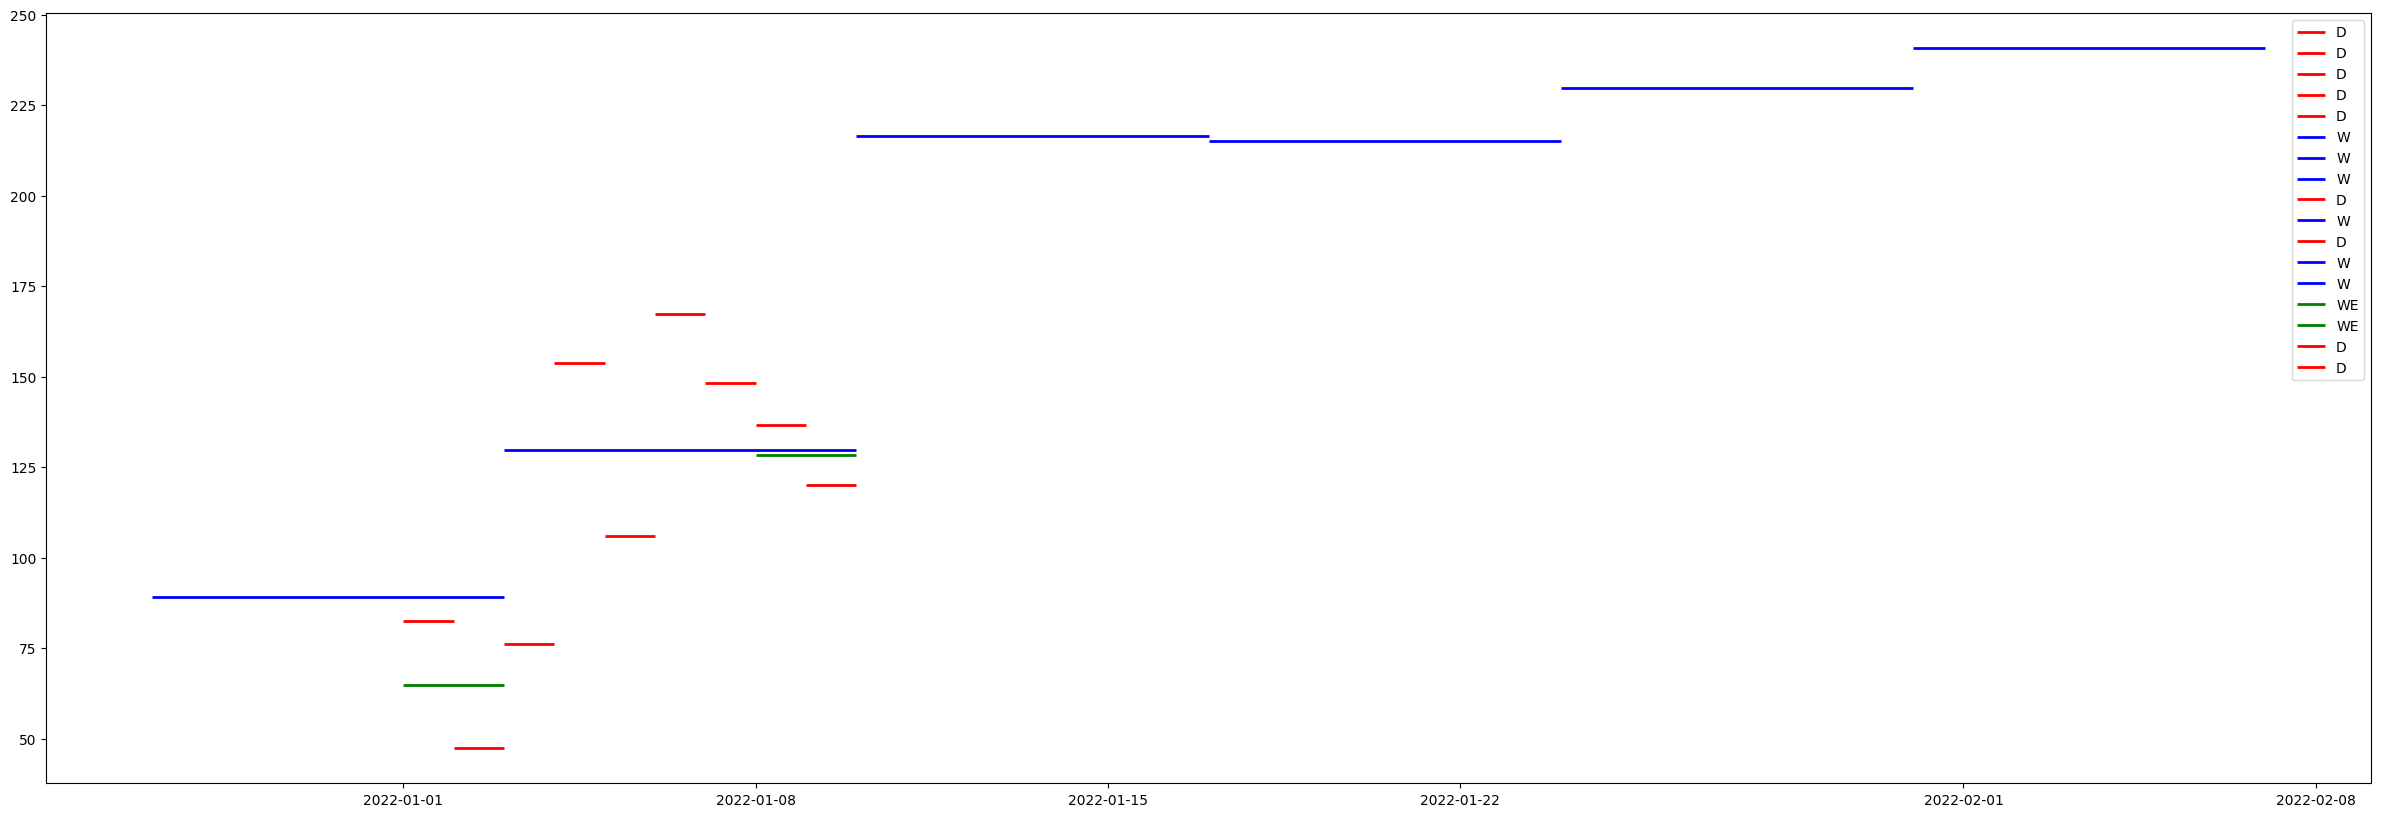

In [4]:
plot_forwards('2022-01-03',periods=['D','W','WE'])

In [5]:
def check_arbitrage(date):
    df = forwards[(forwards['TimeStamp'].astype(str).str.contains(date))|(forwards['TimeStamp'].astype(str)==date)]
    # Assuming df is your DataFrame with the specified data
    df['Begin'] = pd.to_datetime(df['Begin'],utc=True)
    df['End'] = pd.to_datetime(df['End'],utc=True)
    df['contract_length_days'] = (df['End'] - df['Begin']).dt.days

    # Define possible contract pairs (short vs long term)
    pairs = [('D','W'),('D','WE'),('W', 'M'), ('M', 'Q'), ('Q', 'Y')]  

    arbitrage_opportunities = []

    # Iterate over each pair of contracts
    for short, long in pairs:
        # Filter contracts by Identifier
        short_contracts = df[df['Identifier'] == short]
        long_contracts = df[df['Identifier'] == long]

        #find combinations of short contracts that combine to a long contract
        for index,long_contract in long_contracts.iterrows():
            begin = long_contract['Begin']
            end = long_contract['End']
            short_date = begin
            combination = []
            while short_date < end:
                short_contract = short_contracts[(short_contracts['Begin'] == short_date)]
                if short_contract.empty:
                    break
                combination.append(short_contract)
                short_date = short_contract['End'].iloc[0]
            if short_date == end:
                mean_short = np.mean([short['Settlement'] for short in combination])
                long_settlement = long_contract['Settlement']
                if abs(long_settlement - mean_short) > 0.01:
                    arbitrage_opportunities.append({
                        'timestamp': date,
                        'long': long,
                        'short': short,
                        'begin': begin,
                        'end': end,
                        'long_settlement': long_settlement,
                        'short_settlement': mean_short,
                        'profit': long_settlement - mean_short
                    })

    # Display arbitrage opportunities
    arbitrage_df = pd.DataFrame(arbitrage_opportunities)
    return arbitrage_df

In [6]:
def get_forwards(date, periods = ['D', 'W', 'WE', 'M', 'Q', 'Y']):
    data = forwards[((forwards['TimeStamp'].astype(str).str.contains(date))|(forwards['TimeStamp'].astype(str)==date))&(forwards.Identifier.isin(periods))]
    return data.sort_values(by=['Begin'])

In [7]:
#make one big dataframe with arbitrage for every timestamp
arbitrage_df = pd.DataFrame()
for date in forwards['TimeStamp'].astype(str).unique():
    arbitrage_df = pd.concat([arbitrage_df,check_arbitrage(date)])
arbitrage_df.sort_values(by=['profit'],ascending=False)

/var/folders/qy/nd4dhjwd1bzfv6sz65bz5xg80000gn/T/ipykernel_33019/2667412028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Begin'] = pd.to_datetime(df['Begin'],utc=True)
/var/folders/qy/nd4dhjwd1bzfv6sz65bz5xg80000gn/T/ipykernel_33019/2667412028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['End'] = pd.to_datetime(df['End'],utc=True)
/var/folders/qy/nd4dhjwd1bzfv6sz65bz5xg80000gn/T/ipykernel_33019/2667412028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,timestamp,long,short,begin,end,long_settlement,short_settlement,profit
0,2022-03-21 00:00:00+01:00,W,D,2022-03-20 23:00:00+00:00,2022-03-27 22:00:00+00:00,213.41,213.078571,0.331429
1,2022-03-21 00:00:00+01:00,WE,D,2022-03-25 23:00:00+00:00,2022-03-27 22:00:00+00:00,170.44,170.165000,0.275000
0,2022-03-23 00:00:00+01:00,WE,D,2022-03-25 23:00:00+00:00,2022-03-27 22:00:00+00:00,173.08,172.810000,0.270000
3,2022-12-27 00:00:00+01:00,Y,Q,2022-12-31 23:00:00+00:00,2023-12-31 23:00:00+00:00,244.43,244.185000,0.245000
3,2022-12-28 00:00:00+01:00,Y,Q,2022-12-31 23:00:00+00:00,2023-12-31 23:00:00+00:00,238.85,238.605000,0.245000
...,...,...,...,...,...,...,...,...
0,2022-08-25 00:00:00+02:00,Q,M,2022-12-31 23:00:00+00:00,2023-03-31 22:00:00+00:00,936.02,938.420000,-2.400000
2,2022-09-06 00:00:00+02:00,Q,M,2022-12-31 23:00:00+00:00,2023-03-31 22:00:00+00:00,795.00,797.453333,-2.453333
0,2022-08-29 00:00:00+02:00,Q,M,2022-12-31 23:00:00+00:00,2023-03-31 22:00:00+00:00,979.31,981.890000,-2.580000
1,2022-09-05 00:00:00+02:00,Q,M,2022-12-31 23:00:00+00:00,2023-03-31 22:00:00+00:00,860.09,863.003333,-2.913333


In [8]:
#create linear constraints that guarant arbitrage freeness for an hourly price curve
def get_restrictions(timestamp, start_date,end_date):
    #get daily contracts
    daily = get_forwards(timestamp,periods=['D'])
    first_daily, last_daily = daily['Begin'].min(), daily['End'].max()
    s_daily = daily['Settlement'].values*24
    d =len(s_daily)
    C_daily = np.zeros((d,24*d))
    for i in range(d):
        C_daily[i,24*i:24*(i+1)] = 1
    #find the hourly index of the start and end date
    return C_daily,s_daily, first_daily, last_daily

In [9]:
test_forecast = pd.read_csv('data/test_forecast.csv',sep=',')
test_forecast['timestamp'] = pd.to_datetime(test_forecast['ds'], errors='coerce')

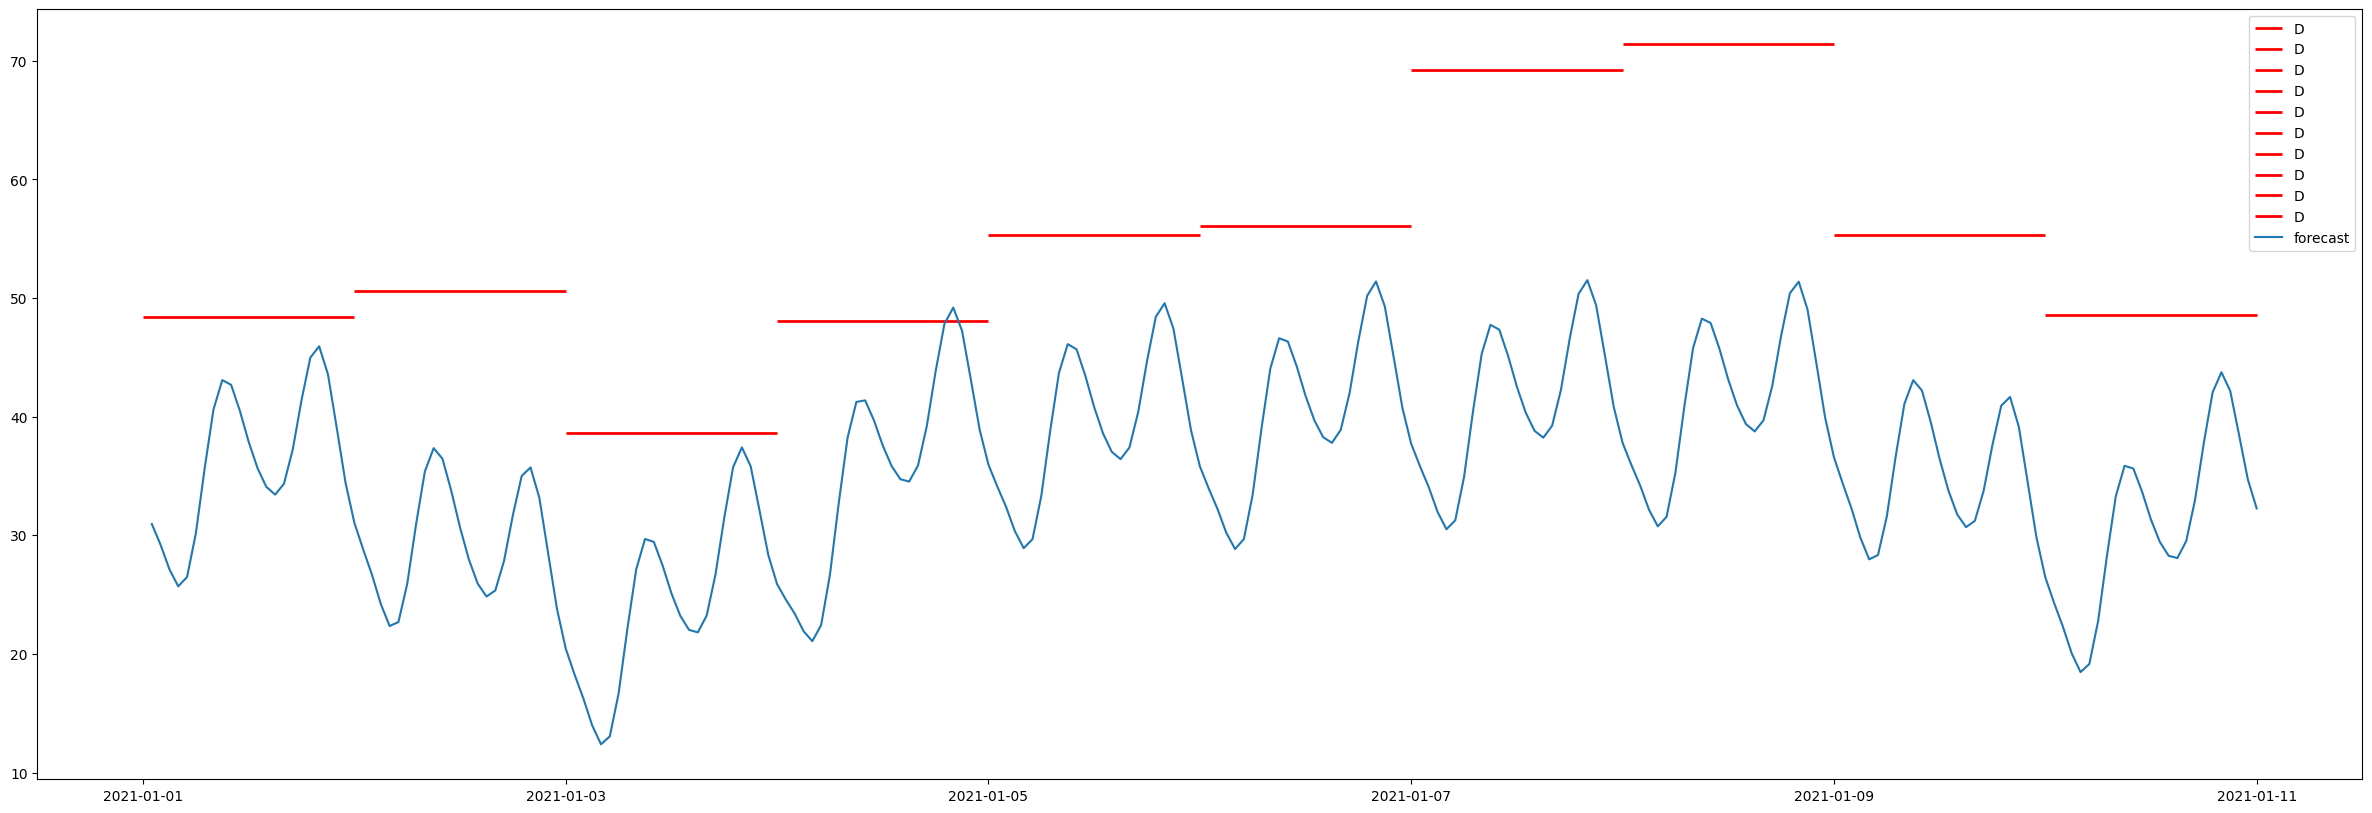

In [10]:
#plot the test forecast together with the forwards in the same period
timestamp = "2021-01-04"
data = get_forwards(timestamp,periods=['D'])
plt.figure(figsize=(30, 10))  # Change the figure size here
for index, row in data.iterrows():
    pass
    plt.hlines(y=row['Settlement'], xmin=row['Begin'], xmax=row['End'], color='red',lw=2,label=row['Identifier'])
plt.plot(test_forecast['timestamp'],test_forecast['yhat'],label='forecast')
plt.legend()
plt.show()

In [11]:
from scipy.optimize import minimize

lambda_1 = 0
yhat = np.array(test_forecast['yhat'].values)
x0 = yhat

def objective_function(x):
    return np.sum(np.square(x-yhat)) + lambda_1*np.sum(np.abs(np.diff(x)))

A_eq, b_eq, _, _ = get_restrictions('2021-01-04',pd.Timestamp('2021-01-04'),pd.Timestamp('2021-01-31'))

result = minimize(objective_function, x0, constraints={'type':'eq','fun': lambda x: A_eq@x - b_eq})

if result.success:
    print("Optimal value:", result.fun)
    print("Optimal solution:", result.x)
else:
    print("Optimization failed:", result.message)

Optimal value: 93324.5415954894
Optimal solution: [43.3042946  41.54118148 39.4825149  38.05503278 38.83723511 42.52293369
 48.00450107 52.95960423 55.43388169 55.03961862 52.8362955  50.22518992
 48.01469046 46.43587553 45.78190928 46.69316461 49.58172883 53.75931667
 57.33454454 58.28621795 55.91822557 51.3876655  46.76038463 43.40399285
 50.39163888 48.2533268  45.79245319 43.93819913 44.2719424  47.49078659
 52.49078381 56.95363656 58.92933811 58.03480606 55.33438523 52.23439992
 49.54841497 47.51275927 46.42586427 46.93332831 49.45236302 53.29964707
 56.58854199 57.30232268 54.74901673 50.08947873 45.3928813  42.02968498
 32.0797511  30.0661173  27.79776569 26.20448549 26.86764544 30.48371302
 35.947474   40.93873807 43.50515572 43.2600392  41.26454933 38.92061815
 37.03707645 35.8450534  35.63736259 37.05361854 40.50473943 45.30086096
 49.54861498 51.22459117 49.62941294 45.91737803 42.1511626  39.69407638
 36.87700243 35.70216448 34.23001439 33.3848858  34.74313509 38.99670803
 

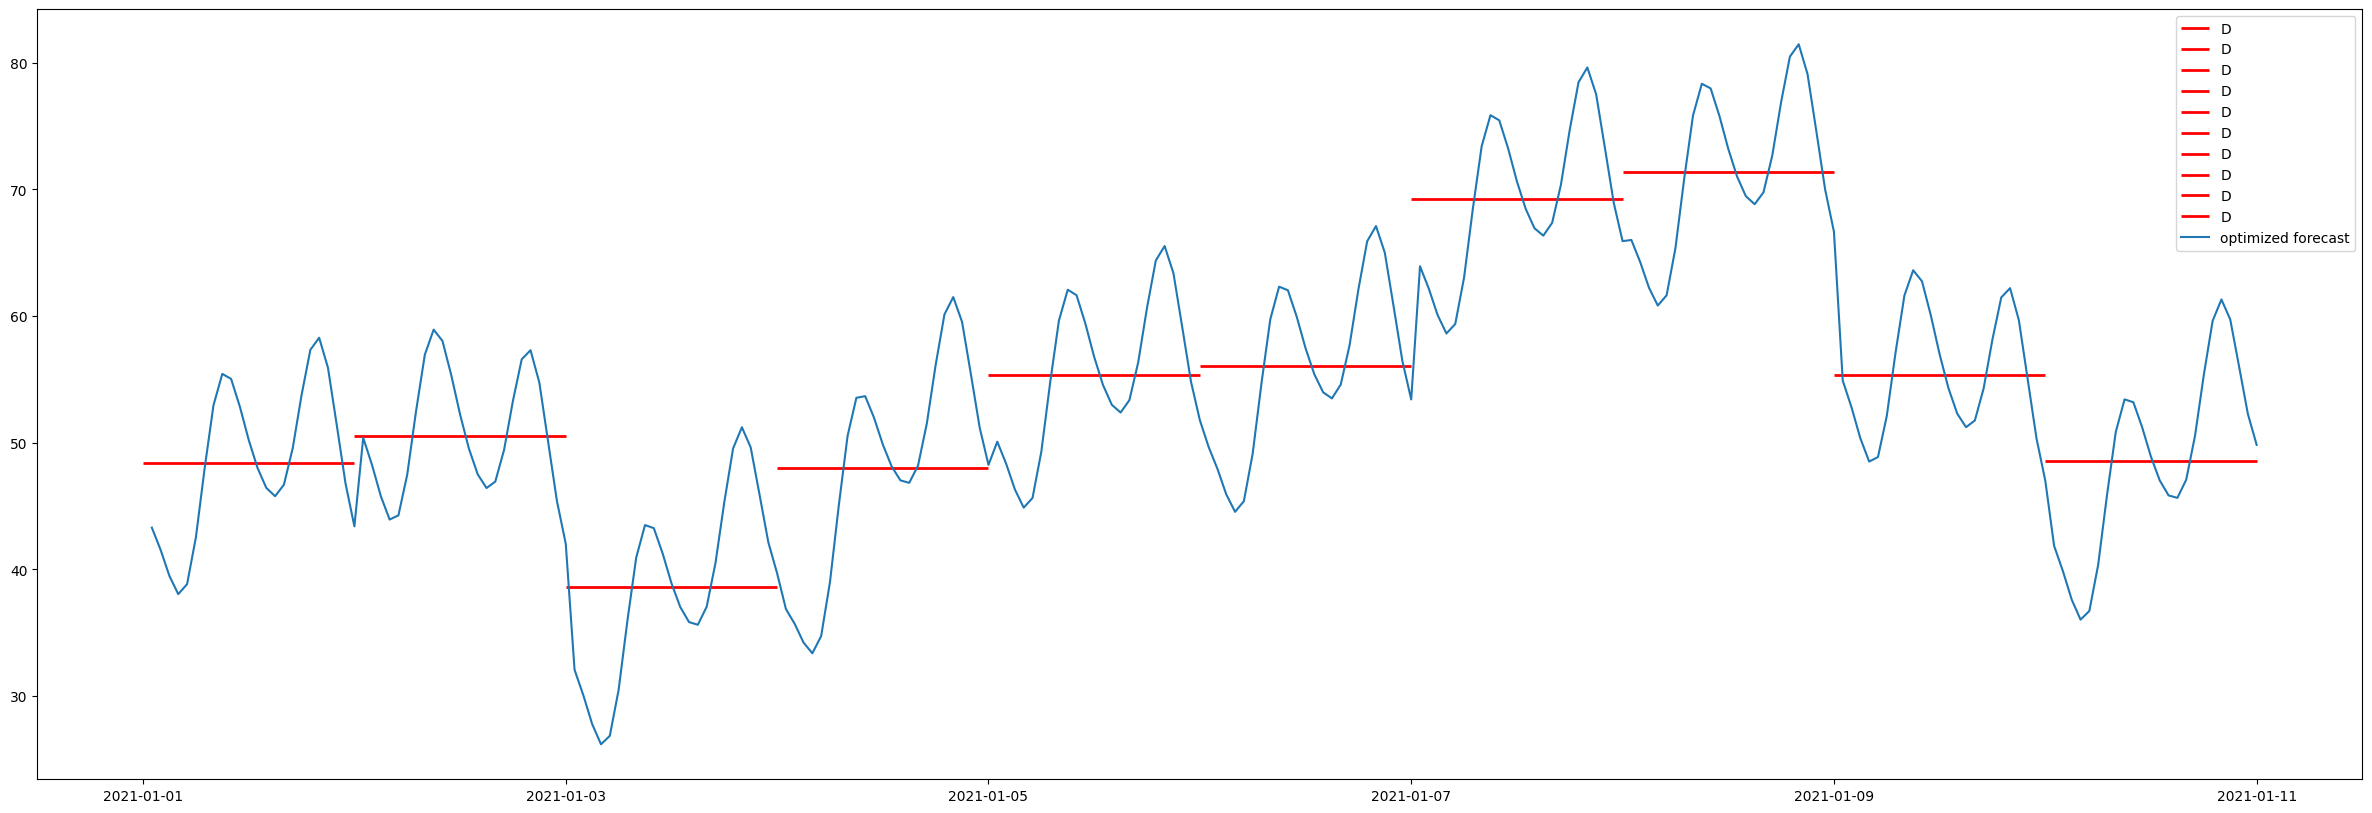

In [12]:
# plot the optimized forecast together with the forwards in the same period
data = get_forwards('2021-01-04',periods=['D'])
plt.figure(figsize=(30, 10))  # Change the figure size here
for index, row in data.iterrows():
    plt.hlines(y=row['Settlement'], xmin=row['Begin'], xmax=row['End'], color='red',lw=2,label=row['Identifier'])
plt.plot(test_forecast['timestamp'],result.x,label='optimized forecast')
plt.legend()
plt.show()
